In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.datasets import imdb

Using TensorFlow backend.


In [3]:
import os
import pandas as pd
import numpy as np
import sys
from tqdm import tqdm

filename1 = '/content/drive/My Drive/datasets/EEGs_Nigeria_transposed/control/'
filename2 = '/content/drive/My Drive/datasets/EEGs_Nigeria_transposed/epilipsy/'
list1 = os.listdir(filename1)
list2 = os.listdir(filename2)

row = 8
data = []
labels = []

for name in tqdm(list1):
    file = os.path.join(filename1, name)
    df = pd.read_csv(file, header=None, error_bad_lines=False)
    values = df.values[row - 1]
    data.append(values[:30000])
    labels.append(0)

for name in tqdm(list2):
    file = os.path.join(filename2, name)
    df = pd.read_csv(file, header=None, error_bad_lines=False)
    values = df.values[row - 1]
    data.append(values[:30000])
    labels.append(1)

data = np.asarray(data)
labels = np.asarray(labels)

100%|██████████| 128/128 [05:14<00:00,  2.45s/it]


In [0]:
import os
import pandas as pd
import numpy as np
import sys
from tqdm import tqdm

filename1 = '/content/drive/My Drive/datasets/EEGs_Nigeria_transposed/control/'
filename2 = '/content/drive/My Drive/datasets/EEGs_Nigeria_transposed/epilipsy/'
list1 = os.listdir(filename1)
list2 = os.listdir(filename2)

row = 'all_sum'
data = []
labels = []
count = 3

for name in tqdm(list1):
    # count -= 1
    # if count == 0:
    #   break
    file = os.path.join(filename1, name)
    df = pd.read_csv(file, header=None, error_bad_lines=False)
    values = df.values.sum(axis =0)
    # data.append(values.tolist())
    data.append(values[:30000])
    labels.append(0)

count = 3
for name in tqdm(list2):
    # count -= 1
    # if count == 0:
    #   break  
    file = os.path.join(filename2, name)
    df = pd.read_csv(file, header=None, error_bad_lines=False)
    values = df.values.sum(axis =0)
    # data.append(values.tolist())
    data.append(values[:30000])
    labels.append(1)

100%|██████████| 128/128 [05:06<00:00,  2.40s/it]


In [7]:
data = np.asarray(data)
labels = np.asarray(labels)

print(data.shape)
# print(type(data[0]))

print(labels.shape)

(221, 30000)
(221,)


In [0]:
def numpy_fillna(data):
    # Get lengths of each row of data
    lens = np.array([len(i) for i in data])

    # Mask of valid places in each row
    mask = np.arange(lens.max()) < lens[:,None]

    # Setup output array and put elements from data into masked positions
    out = np.zeros(mask.shape, dtype=data.dtype)
    out[mask] = np.concatenate(data)
    return out

In [0]:
data = numpy_fillna(data)
# data = data/1000
# data = data*1000
# data

 ...]

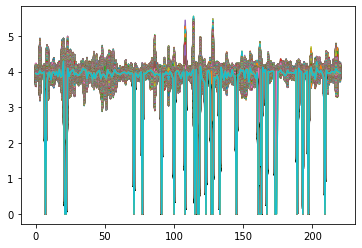

In [0]:
# import matplotlib.pyplot as plt
# plt.plot(data)

In [0]:
# for i in data:
#   print(i.shape)
#   print(min(i))
#   print(max(i))
#   print('\n')

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

In [49]:
print(type(x_train))
print(x_train.shape)
print(x_test.shape)
print(type(x_train[0]))
print(len(x_train[0]))
print(x_train[0])

<class 'numpy.ndarray'>
(148, 30000)
(73, 30000)
<class 'numpy.ndarray'>
30000
[3919.0 3901.0 3904.0 ... 4034.0 4046.0 4050.0]


In [0]:
maxlen = 400

In [51]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# x_train = x_train/1000
# x_test = x_test/1000

print(type(x_train))
print(x_train.shape)
print(x_test.shape)
print(type(x_train[0]))
print(len(x_train[0]))
print(x_train[0])

Pad sequences (samples x time)
<class 'numpy.ndarray'>
(148, 400)
(73, 400)
<class 'numpy.ndarray'>
400
[3890 3881 3878 3877 3876 3877 3888 3894 3892 3893 3897 3896 3893 3894
 3894 3892 3893 3896 3894 3892 3892 3885 3885 3892 3894 3894 3896 3887
 3883 3893 3896 3888 3889 3899 3901 3894 3899 3910 3909 3908 3918 3926
 3924 3925 3930 3930 3924 3928 3935 3931 3923 3923 3926 3925 3926 3929
 3928 3926 3925 3926 3928 3930 3928 3930 3931 3928 3932 3935 3927 3922
 3926 3921 3915 3923 3929 3917 3907 3917 3927 3925 3921 3922 3924 3927
 3929 3936 3943 3934 3925 3929 3929 3917 3914 3922 3930 3926 3913 3914
 3926 3929 3925 3922 3919 3912 3912 3919 3919 3911 3900 3894 3894 3893
 3890 3891 3893 3891 3893 3891 3879 3877 3884 3892 3895 3893 3894 3898
 3895 3892 3888 3883 3880 3882 3883 3887 3895 3888 3876 3882 3894 3894
 3892 3894 3894 3893 3895 3897 3895 3893 3899 3908 3911 3911 3914 3914
 3912 3912 3913 3909 3904 3909 3910 3899 3895 3908 3924 3919 3909 3915
 3929 3927 3922 3927 3929 3928 3929 3927 392

In [36]:
print(type(x_train))
print(x_train.shape)

<class 'numpy.ndarray'>
(148, 400)


In [0]:
x_train = np.expand_dims(x_train, axis=0)
x_test = np.expand_dims(x_test, axis=0)

In [0]:
y_train = np.expand_dims(y_train, axis=0)
y_test = np.expand_dims(y_test, axis=0)

In [76]:
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(1, 148, 400)
(1, 73, 400)
(1, 148)
(1, 73)


In [0]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization, SpatialDropout1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from imblearn.combine import SMOTETomek
import warnings
#Surpressing all deprecation and future warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
#Sets the global random tf seed
# tf.random.set_random_seed(42)

In [69]:
# https://github.com/pvts/Deep-Learning-uni-challenges/blob/master/eeg-classification.py

final_shape = x_train[0].shape

#Conv1D Model
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=(60), strides=2, padding='same',
                 activation='relu', input_shape=(100,4)))
# model.add(MaxPooling1D(12))
model.add(BatchNormalization())
model.add(SpatialDropout1D(rate=0.2))

model.add(Conv1D(filters=108, kernel_size=(60), strides=2, activation='relu', padding='same'))
# model.add(MaxPooling1D(9))
model.add(BatchNormalization())
model.add(SpatialDropout1D(rate=0.2))

model.add(Conv1D(filters=86, kernel_size=(60), strides=2, padding='same', activation='relu'))
# model.add(MaxPooling1D(4))
model.add(BatchNormalization())
model.add(SpatialDropout1D(rate=0.2))
model.add(Flatten())

model.add(Dense(68, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(2, activation='softmax'))

opt='adagrad'
#Compiling the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 50, 128)           30848     
_________________________________________________________________
batch_normalization_5 (Batch (None, 50, 128)           512       
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 50, 128)           0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 25, 108)           829548    
_________________________________________________________________
batch_normalization_6 (Batch (None, 25, 108)           432       
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 25, 108)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 13, 86)           

In [77]:
history = model.fit(x_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    verbose=1, 
                    # validation_data=validation, 
                    # callbacks=callbacks
                    )

Epoch 1/100


ValueError: ignored

In [0]:

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM


# code for building an LSTM with 100 neurons and dropout. Runs for 50 epochs
time_steps = 100
n_features = 4

model = Sequential()
model.add(LSTM(100, return_sequences=False, input_shape=(time_steps, n_features)))
model.add(Dropout(0.5))
#model.add(LSTM(100)) dramatically worse results
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

model.fit(x_train, y_train, 
          batch_size=16, 
          epochs=50)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 100)               42000     
_________________________________________________________________
dropout_12 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 101       
Total params: 42,101
Trainable params: 42,101
Non-trainable params: 0
_________________________________________________________________


ValueError: ignored

In [0]:
score = model.evaluate(x_test, y_test, batch_size=16)

In [0]:
model = Sequential()

batch_size = 32
embedding_dims = 5
filters = 80
kernel_size = 3
hidden_dims = 300
epochs = 500
max_features = 100

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
from __future__ import print_function
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.utils import np_utils

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [16]:
TIME_PERIODS = 100
num_sensors = 4
input_shape = TIME_PERIODS * num_sensors
num_classes = 1

model_m = Sequential()
model_m.add(Reshape((TIME_PERIODS, num_sensors), input_shape=(input_shape,)))
model_m.add(Conv1D(100, 10, activation='relu', input_shape=(TIME_PERIODS, num_sensors)))
model_m.add(Conv1D(100, 10, activation='relu'))
model_m.add(MaxPooling1D(3))
model_m.add(Conv1D(160, 10, activation='relu'))
model_m.add(Conv1D(160, 10, activation='relu'))
model_m.add(GlobalAveragePooling1D())
model_m.add(Dropout(0.5))
model_m.add(Dense(num_classes, activation='sigmoid'))
model_m.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_m.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 100, 4)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 91, 100)           4100      
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 82, 100)           100100    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 27, 100)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 18, 160)           160160    
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 9, 160)            256160    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 160)              

In [17]:
batch_size = 32
epochs = 300

history = model_m.fit(
          x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          # callbacks = [checkpoint, csv_logger],
          validation_data=(x_test, y_test))

Train on 148 samples, validate on 73 samples
Epoch 1/300
148/148 [==============================] - 0s 2ms/step - loss: 510.4447 - accuracy: 0.5068 - val_loss: 161.9613 - val_accuracy: 0.4795
Epoch 2/300
148/148 [==============================] - 0s 231us/step - loss: 126.2711 - accuracy: 0.4054 - val_loss: 33.3472 - val_accuracy: 0.6164
Epoch 3/300
148/148 [==============================] - 0s 211us/step - loss: 34.1570 - accuracy: 0.4730 - val_loss: 11.1018 - val_accuracy: 0.4795
Epoch 4/300
148/148 [==============================] - 0s 220us/step - loss: 12.8125 - accuracy: 0.5068 - val_loss: 7.8531 - val_accuracy: 0.6164
Epoch 5/300
148/148 [==============================] - 0s 217us/step - loss: 5.2331 - accuracy: 0.5270 - val_loss: 3.1294 - val_accuracy: 0.4795
Epoch 6/300
148/148 [==============================] - 0s 238us/step - loss: 3.0586 - accuracy: 0.5811 - val_loss: 2.7719 - val_accuracy: 0.6164
Epoch 7/300
148/148 [==============================] - 0s 213us/step - loss: 

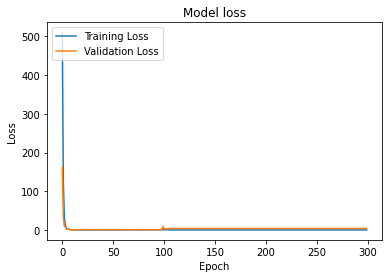

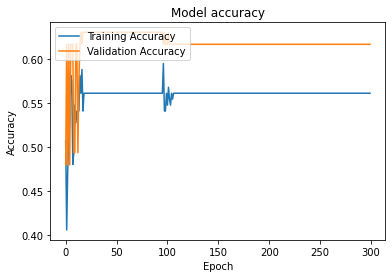

In [18]:
# author Manoj kaushik
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

In [0]:
x_train.shape

(148, 30000)

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 30000, 5)          500       
_________________________________________________________________
dropout_3 (Dropout)          (None, 30000, 5)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 29998, 80)         1280      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 80)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               24300     
_________________________________________________________________
dropout_4 (Dropout)          (None, 300)               0         
_________________________________________________________________
activation_3 (Activation)    (None, 300)              

In [0]:
slug = 'kela'

In [0]:
pathModelSave = '/content/drive/My Drive/saveModels/epi_eeg_conv1D'+'_nigiria_'+str(embedding_dims)+'_'+str(filters)+'_'+str(batch_size)+'_'+str(epochs)+'_'+slug+'_.hdf5'
pathToSaveCSV = '/content/drive/My Drive/saveModels/epi_eeg_conv1D'+'_nigiria_'+str(embedding_dims)+'_'+str(filters)+'_'+str(batch_size)+'_'+str(epochs)+'_'+slug+'_.csv'

In [0]:
pathModelSave

'/content/drive/My Drive/saveModels/epi_eeg_conv1D_nigiria_5_80_32_1000_kela_.hdf5'

In [0]:
import time
from keras.callbacks import ModelCheckpoint
from keras.callbacks import CSVLogger

checkpoint = ModelCheckpoint(pathModelSave, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
csv_logger = CSVLogger(pathToSaveCSV, append=False, separator=',')

tic = time.clock()
history = model.fit(
          x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          callbacks = [checkpoint, csv_logger],
          validation_data=(x_test, y_test))
toc = time.clock()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 148 samples, validate on 73 samples
Epoch 1/500
148/148 [==============================] - 7s 44ms/step - loss: 0.6923 - accuracy: 0.5135 - val_loss: 0.6888 - val_accuracy: 0.6301

Epoch 00001: val_accuracy improved from -inf to 0.63014, saving model to /content/drive/My Drive/saveModels/epi_eeg_conv1D_nigiria_5_80_32_1000_kela_.hdf5
Epoch 2/500
148/148 [==============================] - 7s 45ms/step - loss: 0.6894 - accuracy: 0.5541 - val_loss: 0.6845 - val_accuracy: 0.6301

Epoch 00002: val_accuracy did not improve from 0.63014
Epoch 3/500
148/148 [==============================] - 7s 47ms/step - loss: 0.6874 - accuracy: 0.5541 - val_loss: 0.6826 - val_accuracy: 0.6301

Epoch 00003: val_accuracy did not improve from 0.63014
Epoch 4/500
148/148 [==============================] - 6s 39ms/step - loss: 0.6865 - accuracy: 0.5541 - val_loss: 0.6804 - val_accuracy: 0.6301

Epoch 00004: val_accuracy did not improve from 0.63014
Epoch 5/500
148/148 [==============================] - 

In [0]:
time = (toc-tic)/60
print("Total training time is: ", time)

Total training time is:  90.82687993333333


In [0]:
# acc> 54.795 %, tt: 1.380903566666666 , ml: 400 , bs: 32 , e_d: 5 , f: 80 , k_s: 3 , h_d: 300 , epo: 500 , m_f: 10000 , of row number: 1
# in row 2, negative values
# acc> 56.164 %, tt: 1.2844660333333309 , ml: 400 , bs: 32 , e_d: 5 , f: 80 , k_s: 3 , h_d: 300 , epo: 500 , m_f: 10000 , of row number: 3
# in row 4, negative values
# in row 5, negative values
# acc> 49.315 %, tt: 1.2784963500000004 , ml: 400 , bs: 32 , e_d: 5 , f: 80 , k_s: 3 , h_d: 300 , epo: 500 , m_f: 10000 , of row number: 6
# in row 7, negative values
# acc> 56.164 %, tt: 1.331469983333333 , ml: 400 , bs: 32 , e_d: 5 , f: 80 , k_s: 3 , h_d: 300 , epo: 500 , m_f: 10000 , of row number: 8
# acc> 35.616 %, tt: 1.2714899166666782 , ml: 400 , bs: 32 , e_d: 5 , f: 80 , k_s: 3 , h_d: 300 , epo: 500 , m_f: 10000 , of row number: 9
# in row 10, negative values
# in row 11, negative values
# acc> 45.205 %, tt: 1.2967367499999995 , ml: 400 , bs: 32 , e_d: 5 , f: 80 , k_s: 3 , h_d: 300 , epo: 500 , m_f: 10000 , of row number: 12
# acc> 45.205 %, tt: 1.2612400166666664 , ml: 400 , bs: 32 , e_d: 5 , f: 80 , k_s: 3 , h_d: 300 , epo: 500 , m_f: 10000 , of row number: 13
# in row 14, negative values

_, acc = model.evaluate(x_test, y_test, verbose=0)
print('acc> %.3f' % (acc* 100.0), '%, tt:', time,', ml:',maxlen,', bs:',batch_size,', e_d:',embedding_dims,
      ', f:',filters,', k_s:',kernel_size,', h_d:',hidden_dims,', epo:',epochs,', m_f:',max_features,', of row number:',row)

acc> 63.014 %, tt: 90.82687993333333 , ml: 30000 , bs: 32 , e_d: 5 , f: 80 , k_s: 3 , h_d: 300 , epo: 500 , m_f: 100 , of row number: 8


In [0]:
from keras.models import load_model
model_new = load_model(pathModelSave)

_, acc = model_new.evaluate(x_test, y_test, verbose=0)
print('acc> %.3f' % (acc* 100.0), '%, tt:', time,', ml:',maxlen,', bs:',batch_size,', e_d:',embedding_dims,
      ', f:',filters,', k_s:',kernel_size,', h_d:',hidden_dims,', epo:',epochs,', m_f:',max_features,', of row number:',row)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


acc> 63.014 %, tt: 90.82687993333333 , ml: 30000 , bs: 32 , e_d: 5 , f: 80 , k_s: 3 , h_d: 300 , epo: 500 , m_f: 100 , of row number: 8


(73,)
[1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


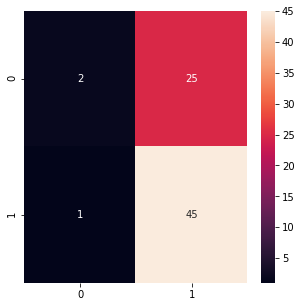

In [0]:
import matplotlib.pyplot as plt
# plt.hist(model_new.predict(x_test))
from sklearn.metrics import confusion_matrix
Y_prediction = model_new.predict(x_test)
Y_pred_classes = []
for i in Y_prediction:
  if i[0] < 0.5:
    Y_pred_classes.append(0)
  else:
    Y_pred_classes.append(1)

Y_pred_classes = np.asarray(Y_pred_classes)
print(Y_pred_classes.shape)
print(y_test)
confusion_mtx = confusion_matrix(y_test, Y_pred_classes)

import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(confusion_mtx, annot=True, fmt="d");

In [0]:
pathModelSave

'/content/drive/My Drive/saveModels/epi_eeg_conv1D_nigiria_5_80_32_1000_kela_.hdf5'

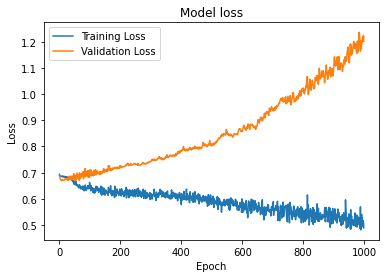

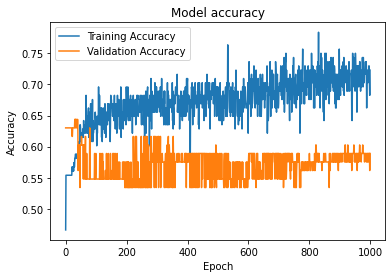

In [0]:
# author Manoj kaushik
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

In [0]:
# testing accuracies
import time
import os
import pandas as pd
import numpy as np
import sys
from keras.models import load_model
model = load_model(pathModelSave)

def predict_fun(filename, type, row):
  list = os.listdir(filename)
  list.sort()
  tic = time.clock()
  count_control = 0
  count = 0
  for name in list:
      count += 1
      file = os.path.join(filename, name)
      df = pd.read_csv(file, header = None, error_bad_lines = False)
      values = df.values[row - 1]
      data = []
      data.append(values.tolist())
      data = np.asarray(data)
      values = sequence.pad_sequences(data, maxlen = maxlen)
      p = model.predict(values)[0][0]
      if p < 0.5:
        count_control += 1
      #   print(count, '. ', name, ": Control predicted")
      # else :
      #   print(count, '. ', name, ": Epilipsy Pridicted")
  toc = time.clock()
  total_ele = len(list)
  print('total files of ' + str(type)+' are :', count, '| control predicted:', count_control, '| epilipsy predicted:', count - count_control, '| row',row)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [0]:
# total files of control are : 93  control predicted: 91  epilipsy predicted: 2 | row 8
# total files of epilipsy are : 128  control predicted: 21  epilipsy predicted: 107 | row 8

#     ------------------------------------------------------------------------

# total files of control are : 46  control predicted: 15  epilipsy predicted: 31 | row 2
# total files of epilipsy are : 51  control predicted: 14  epilipsy predicted: 37 | row 2

In [0]:
predict_fun('/content/drive/My Drive/datasets/EEGs_Nigeria_transposed/control/', 'control', 8)
predict_fun('/content/drive/My Drive/datasets/EEGs_Nigeria_transposed/epilipsy/', 'epilipsy', 8)

InvalidArgumentError: ignored

In [0]:
predict_fun('/content/drive/My Drive/datasets/EEGs_Guinea-Bissau_classified/control/', 'control', 2)
predict_fun('/content/drive/My Drive/datasets/EEGs_Guinea-Bissau_classified/epilipsy/', 'epilipsy', 2)